In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import sklearn

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


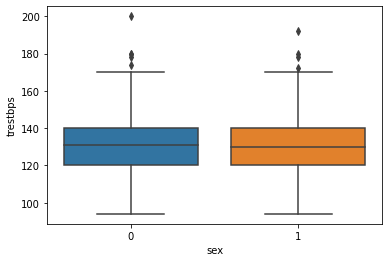

In [ ]:
sns.boxplot(x='sex',y='trestbps',data=df)

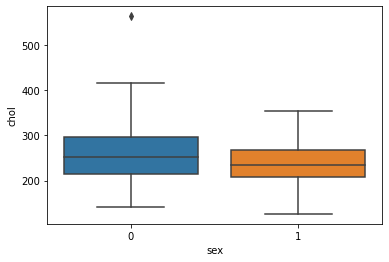

In [ ]:
sns.boxplot(x='sex',y='chol',data=df)

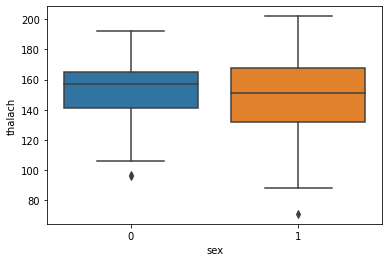

In [ ]:
sns.boxplot(x='sex',y='thalach',data=df)

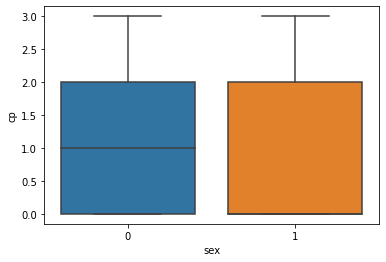

In [ ]:
sns.boxplot(x='sex',y='cp',data=df)

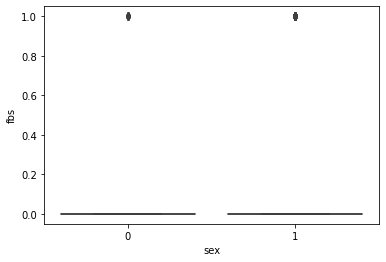

In [ ]:
sns.boxplot(x='sex',y='fbs',data=df)

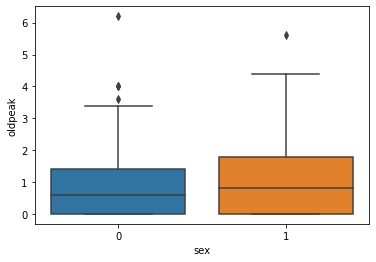

In [ ]:
sns.boxplot(x='sex',y='oldpeak',data=df)

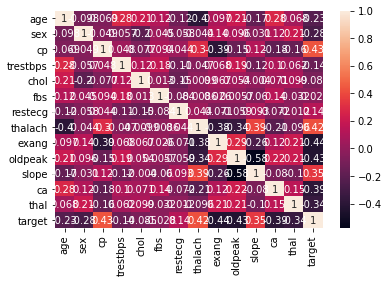

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Linear Regression

In [ ]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
        'oldpeak','slope','ca','thal']]

y = df['target']        

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.35,random_state=11)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([-6.44615810e-04, -2.26102616e-01,  1.17317620e-01, -2.46648887e-03,
       -2.26436919e-04,  1.02260307e-01,  3.73474774e-02,  4.60744808e-03,
       -4.18630138e-02, -4.54046076e-02,  7.67106824e-02, -1.04505876e-01,
       -2.33282097e-01])

In [ ]:
coef_df = pd.DataFrame(lr.coef_,X.columns, columns=['Coef'])

In [ ]:
coef_df

,Coef
age,-0.000645
sex,-0.226103
cp,0.117318
trestbps,-0.002466
chol,-0.000226
fbs,0.102260
restecg,0.037347
thalach,0.004607
exang,-0.041863
oldpeak,-0.045405


In [ ]:
predictions = lr.predict(X_test)

In [ ]:
predictions

array([ 0.14185678,  0.79934633,  0.84215562,  0.23320861,  0.97688558,
        0.86292706,  0.39765136,  0.9642116 ,  0.52730091,  0.89859562,
        0.85591537,  0.33726735, -0.17110964,  0.80084605,  0.57238118,
        0.22720106,  1.01863587,  1.20935045,  0.69529568,  0.2771953 ,
        1.1767238 ,  0.05595703, -0.19740354,  0.97558125,  0.96614453,
        0.6364544 ,  0.57666961,  1.01209676,  1.00288748, -0.05379061,
        0.65694533,  1.17027613,  1.11908236,  0.56549817,  1.2063874 ,
        0.91784034,  0.68772314, -0.02704313,  0.48342454,  0.20941417,
       -0.06431963,  0.73155256,  0.73042851,  1.14450714,  0.75031684,
        0.26075493,  0.65214655,  0.4955664 , -0.09941378,  0.35017633,
        0.86658437,  0.52477729,  0.1230271 ,  0.06862162,  1.31376876,
        0.45223637,  0.62217916, -0.00417866,  0.49107917,  0.63544759,
        1.06204417,  0.09721315,  0.92656841,  0.05163827,  0.30836528,
       -0.24522509, -0.26744486,  0.28297223,  1.02179753,  0.84

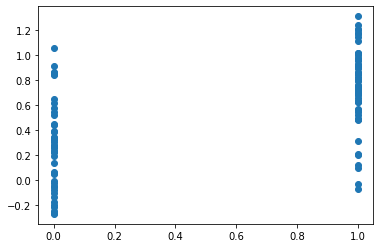

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

0.3254763165749851

In [ ]:
metrics.mean_squared_error(y_test,predictions)

0.17622878179953586

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()

In [ ]:
lgr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = lgr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(y_test,predict)

array([[34, 10],
       [11, 52]])

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        44
           1       0.84      0.83      0.83        63

    accuracy                           0.80       107
   macro avg       0.80      0.80      0.80       107
weighted avg       0.80      0.80      0.80       107



#K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  pred_i = knn.predict(X_test)

  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

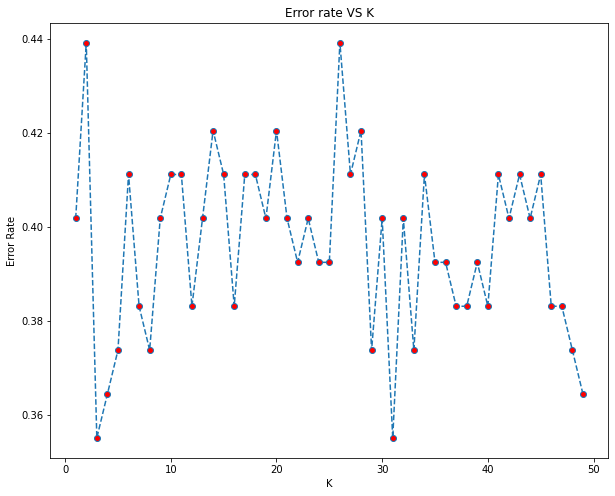

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50),error_rate,marker='o',linestyle='dashed',markerfacecolor='red')
plt.title("Error rate VS K")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
kn = KNeighborsClassifier(n_neighbors=31)
kn.fit(X_train,y_train)

pred = kn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,predict)

array([[34, 10],
       [11, 52]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58        44
           1       0.70      0.68      0.69        63

    accuracy                           0.64       107
   macro avg       0.64      0.64      0.64       107
weighted avg       0.65      0.64      0.65       107



In [ ]:
heart_model = "heart_model.pkl"

with open(heart_model, 'wb') as  file:
  pickle.dump(lgr, file)

In [ ]:
filename = 'heart.sav'
joblib.dump(lgr,filename)

['heart.sav']

In [ ]:
sklearn = sklearn.__version__
print(sklearn)

0.22.2.post1
